We start by cleaning our data. Tasks during this section include:

Drop NaN values from DataFrame
Removing rows based on a condition
Change the type of columns (to_numeric, to_datetime, astype)
Once we have cleaned up our data a bit, we move the data exploration section. In this section we explore 5 high level business questions related to our data:

What was the best month for sales? How much was earned that month?
What city sold the most product?
What time should we display advertisemens to maximize the likelihood of customer’s buying product?
What products are most often sold together?
What product sold the most? Why do you think it sold the most?
To answer these questions we walk through many different pandas & matplotlib methods. They include:

Concatenating multiple csvs together to create a new DataFrame (pd.concat)
Adding columns
Parsing cells as strings to make new columns (.str)
Using the .apply() method
Using groupby to perform aggregate analysis
Plotting bar charts and lines graphs to visualize our results
Labeling our graphs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import pandas

In [3]:
path="C:\\Users\kmmoh\Downloads\Sales_Data"
files =[file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files
all_data=pd.DataFrame()
for file in files:
    current_data=pd.read_csv(path+"/"+file)
    all_data =pd.concat([current_data,all_data])
    
all_data.to_csv("all_data.csv",index=False)
 

In [4]:
df=pd.read_csv(r'C:\\Users\kmmoh\Downloads\dummy\all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


In [6]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [7]:
df.shape

(186850, 6)

In [8]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [9]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [10]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

# clean the data

In [11]:
nan_df=all_data[all_data.isna().any(axis=1)]
display(nan_df.head())


all_data=all_data.dropna(how='all')
all_data.isna().sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
198,NaN,NaN,NaN,NaN,NaN,NaN
574,NaN,NaN,NaN,NaN,NaN,NaN
776,NaN,NaN,NaN,NaN,NaN,NaN
1383,NaN,NaN,NaN,NaN,NaN,NaN
1436,NaN,NaN,NaN,NaN,NaN,NaN


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#Get Month

In [12]:
all_data= all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


# typecast columns to correct type 

In [13]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

# Augment data with additional columns

In [14]:
#What was the best month for sales? How much was earned that month?
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

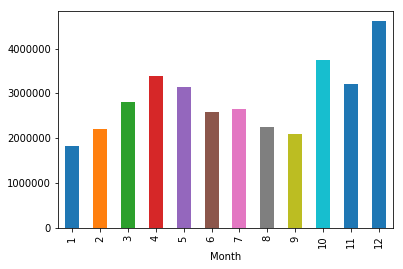

In [15]:
all_data.groupby(['Month']).sum()['Sales'].plot.bar()
all_data.groupby(['Month']).sum()['Sales']

range(1, 13)


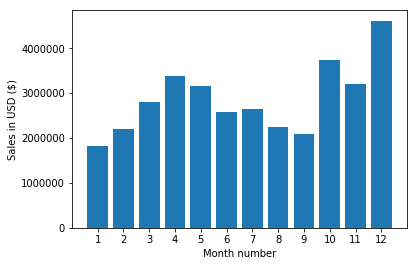

In [16]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()



In [17]:
# What city sold the most product?


# Add city column

In [18]:
def get_city(x) :
    return x.split(',')[1]
def get_state(y) :
    return y.split(",")[2].split(" ")[1]
#get_city("682 Chestnut St, Boston, MA 02215")
#get_state("682 Chestnut St, Boston, MA 02215")
all_data['City']=all_data['Purchase Address'].apply(lambda x :f"{get_city(x)}, {get_state(x)}")

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Month 2,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",15.36,9,9,"Los Angeles, CA"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",23.90,9,9,"Austin, TX"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",11.95,9,9,"Los Angeles, CA"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",149.99,9,9,"Seattle, WA"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",11.95,9,9,"Atlanta, GA"


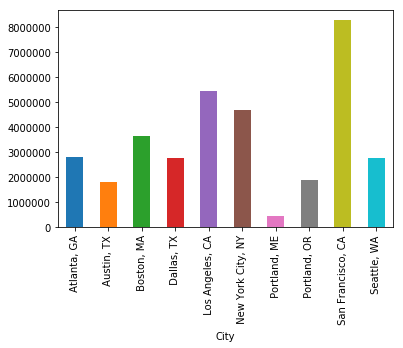

In [21]:
all_data.groupby(['City']).sum()['Sales'].plot.bar()


Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [27]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Hour'].head()

0    14
1    10
2    17
3     7
4    19
Name: Hour, dtype: int64

In [33]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Month 2,City,Hour
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",15.36,9,9,"Los Angeles, CA",14
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",23.90,9,9,"Austin, TX",10
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",11.95,9,9,"Los Angeles, CA",17
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",149.99,9,9,"Seattle, WA",7
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",11.95,9,9,"Atlanta, GA",19


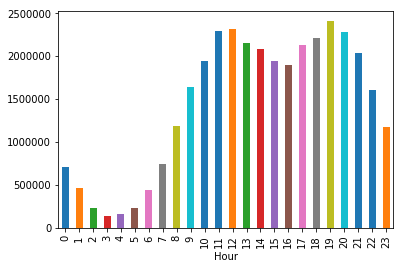

In [36]:
all_data.groupby(['Hour']).sum()['Sales'].plot.bar()


In [ ]:
 # recommendation is slightly before 11am  to 1pm and  7 to 8pm

Question 4: What products are most often sold together?

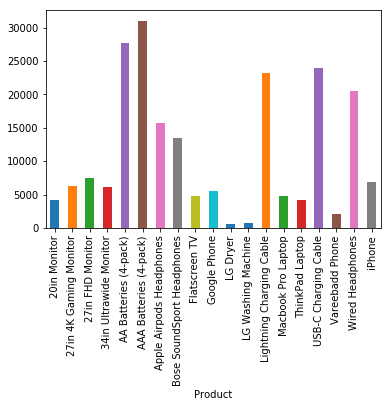

In [37]:
all_data.groupby('Product').sum()['Quantity Ordered'].plot.bar()

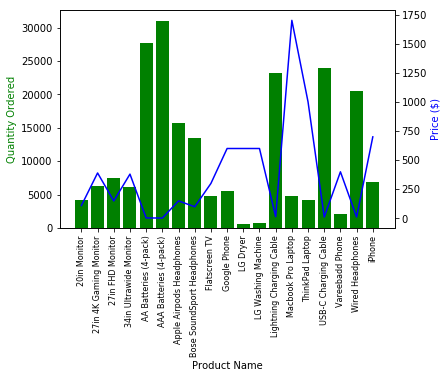

In [44]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']
keys = [pair for pair, df in all_data.groupby('Product')]
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, all_data.groupby('Product').sum()['Quantity Ordered'], color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()